In [2]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf

# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [3]:
print(X.shape, y.shape)

(768, 8) (768,)


In [4]:
print(X[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


In [6]:
print(y[:5])

[1. 0. 1. 0. 1.]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [9]:
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


In [10]:
model = Sequential()
#YOUR CODE HERE for hidden layer and output layer.
model.add(Dense(8, input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
batch_size = 10 	# define the batch size
n_epoch = 50	# define the number of epoch

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

# fit the keras model on the dataset
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=n_epoch, validation_data=test_dataset)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6529 - loss: 31.0830 - val_accuracy: 0.6320 - val_loss: 15.2178
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 11.0034 - val_accuracy: 0.6061 - val_loss: 6.4269
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 5.7887 - val_accuracy: 0.6407 - val_loss: 3.6561
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6269 - loss: 3.7189 - val_accuracy: 0.6494 - val_loss: 2.8029
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 2.8938 - val_accuracy: 0.6450 - val_loss: 2.5497
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6402 - loss: 2.8215 - val_accuracy: 0.6623 - val_loss: 2.2840
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 2.0891 - val_accuracy: 0.6407 - val_loss: 2.0249
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6391 - loss: 2.0177 - val_accuracy: 0.6320 - val_lo

training loss: 0.631059
testing loss: 0.689988
training accuracy: 0.705773
testing accuracy: 0.701299


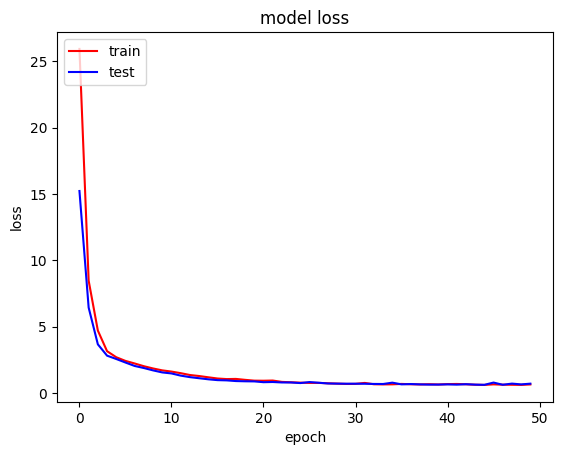

In [12]:
print('training loss: %.6f' % (history.history['loss'][-1]))
print('testing loss: %.6f' % (history.history['val_loss'][-1]))
print('training accuracy: %.6f' % (history.history['accuracy'][-1]))
print('testing accuracy: %.6f' % (history.history['val_accuracy'][-1]))

plt.plot(history.history['loss'], color='red')
#plt.plot(history.history['val_accuracy']
plt.plot(history.history['val_loss'], color='blue')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [13]:
print(X[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


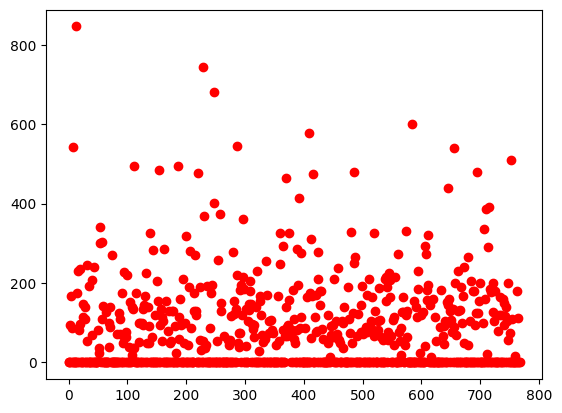

In [15]:
feature = dataset[:,4]
plt.plot(feature, 'ro')
plt.show()

In [18]:
model = Sequential()
#YOUR CODE HERE for hidden layer and output layer.
model.add(Dense(8, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
batch_size = 10 	# define the batch size
n_epoch = 50	# define the number of epoch

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

# fit the keras model on the dataset
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=n_epoch, validation_data=test_dataset)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3263 - loss: 18.4910 - val_accuracy: 0.5714 - val_loss: 2.7100
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 1.9858 - val_accuracy: 0.4589 - val_loss: 1.9611
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5321 - loss: 1.4831 - val_accuracy: 0.4805 - val_loss: 1.5843
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5217 - loss: 1.3407 - val_accuracy: 0.4978 - val_loss: 1.3056
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5430 - loss: 1.1364 - val_accuracy: 0.5671 - val_loss: 1.1703
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5846 - loss: 1.0034 - val_accuracy: 0.5108 - val_loss: 1.0893
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6089 - loss: 0.9358 - val_accuracy: 0.6364 - val_loss: 1.1454
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 0.9017 - val_accuracy: 0.6061 - val_loss

training loss: 0.613860
testing loss: 0.641318
training accuracy: 0.675978
testing accuracy: 0.645022


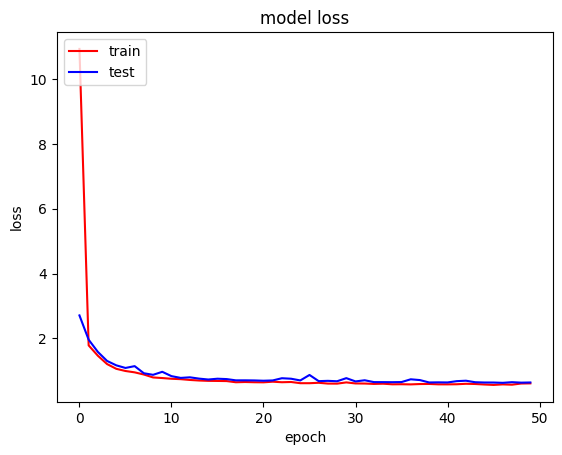

In [20]:
print('training loss: %.6f' % (history.history['loss'][-1]))
print('testing loss: %.6f' % (history.history['val_loss'][-1]))
print('training accuracy: %.6f' % (history.history['accuracy'][-1]))
print('testing accuracy: %.6f' % (history.history['val_accuracy'][-1]))

plt.plot(history.history['loss'], color='red')
#plt.plot(history.history['val_accuracy']
plt.plot(history.history['val_loss'], color='blue')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [21]:
nn = [8,10,12,14,16]
loss_test=[]
loss_train=[]
accuracy_test=[]
accuracy_train=[]

In [23]:
batch_size = 10
n_epoch = 50
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

for i in nn:
  model = Sequential()
  model.add(Dense(i, input_shape=(8,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(train_dataset, epochs=n_epoch, validation_data=test_dataset)


  loss_train.append(history.history['loss'][-1])
  loss_test.append(history.history['val_loss'][-1])
  accuracy_train.append(history.history['accuracy'][-1])
  accuracy_test.append(history.history['val_accuracy'][-1])

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3675 - loss: 4.4329 - val_accuracy: 0.5152 - val_loss: 1.6194
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4846 - loss: 1.4802 - val_accuracy: 0.5844 - val_loss: 1.2702
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 1.1789 - val_accuracy: 0.5844 - val_loss: 1.1893
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5877 - loss: 1.0037 - val_accuracy: 0.5974 - val_loss: 1.1625
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.9611 - val_accuracy: 0.6234 - val_loss: 1.0517
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6084 - loss: 0.9166 - val_accuracy: 0.6234 - val_loss: 1.0455
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6009 - loss: 0.9374 - val_accuracy: 0.5974 - val_loss: 1.0267
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.8087 - val_accuracy: 0.6190 - val_loss:

i =  8 training loss: 0.607557 testing loss: 0.770395
i =  10 training loss: 0.668165 testing loss: 0.804741
i =  12 training loss: 0.666639 testing loss: 0.846451
i =  14 training loss: 0.578756 testing loss: 0.665552
i =  16 training loss: 0.566043 testing loss: 0.686659
i =  8 training accuracy: 0.685289 testing accuracy: 0.645022
i =  10 training accuracy: 0.707635 testing accuracy: 0.692641
i =  12 training accuracy: 0.694600 testing accuracy: 0.627706
i =  14 training accuracy: 0.716946 testing accuracy: 0.714286
i =  16 training accuracy: 0.702048 testing accuracy: 0.727273


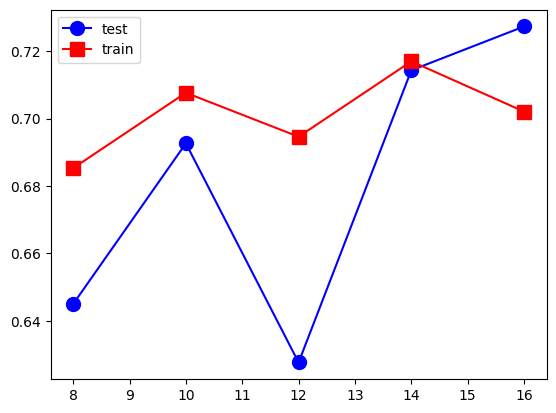

In [24]:
n = 0
for k in nn:
  print('i = ', k, end = ' ')
  print('training loss: %.6f' % (loss_train[n]), end = ' ')
  print('testing loss: %.6f' % (loss_test[n]))
  n = n + 1

n = 0
for k in nn:
  print('i = ', k, end = ' ')
  print('training accuracy: %.6f' % (accuracy_train[n]), end = ' ')
  print('testing accuracy: %.6f' % (accuracy_test[n]))
  n = n + 1

plt.plot(nn, accuracy_test, 'bo-', markersize=10, label = 'test')
plt.plot(nn, accuracy_train, 'rs-', markersize=10, label = 'train')
plt.legend()
plt.show()

In [26]:
nh1 = [8,12,16]
nh2 = [8,12,16,20]

loss_test=[]
loss_train=[]
accuracy_test=[]
accuracy_train=[]

batch_size = 10 	# define the batch size
n_epoch = 50	# define the number of epoch

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

for h1 in nh1:
  for h2 in nh2:
    model = Sequential()
    model.add(Dense(h1, input_shape=(8,), activation='relu'))
    model.add(Dense(h2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(train_dataset, epochs=n_epoch, validation_data=test_dataset)


    loss_train.append(history.history['loss'][-1])
    loss_test.append(history.history['val_loss'][-1])
    accuracy_train.append(history.history['accuracy'][-1])
    accuracy_test.append(history.history['val_accuracy'][-1])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3617 - loss: 9.7814 - val_accuracy: 0.3593 - val_loss: 4.1008
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3294 - loss: 2.5246 - val_accuracy: 0.6190 - val_loss: 0.9035
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6225 - loss: 0.6903 - val_accuracy: 0.6017 - val_loss: 0.7170
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.6791 - val_accuracy: 0.6061 - val_loss: 0.7025
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.6632 - val_accuracy: 0.6147 - val_loss: 0.6963
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6198 - loss: 0.6836 - val_accuracy: 0.6147 - val_loss: 0.6924
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - loss: 0.6365 - val_accuracy: 0.5931 - val_loss: 0.7205
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 0.6731 - val_accuracy: 0.5801 - val_loss: 0.7748
Epo

h1 =  8  h2 =  8 training loss: 0.585107 testing loss: 0.669889
h1 =  8  h2 =  12 training loss: 0.590015 testing loss: 0.787234
h1 =  8  h2 =  16 training loss: 0.550286 testing loss: 0.662889
h1 =  8  h2 =  20 training loss: 0.594672 testing loss: 0.748152
h1 =  12  h2 =  8 training loss: 0.559311 testing loss: 0.708423
h1 =  12  h2 =  12 training loss: 0.564544 testing loss: 0.838866
h1 =  12  h2 =  16 training loss: 0.553688 testing loss: 0.725457
h1 =  12  h2 =  20 training loss: 0.594271 testing loss: 0.728002
h1 =  16  h2 =  8 training loss: 0.561085 testing loss: 0.684561
h1 =  16  h2 =  12 training loss: 0.571914 testing loss: 0.702098
h1 =  16  h2 =  16 training loss: 0.573835 testing loss: 0.572486
h1 =  16  h2 =  20 training loss: 0.546929 testing loss: 0.752438
h1 =  8  h2 =  8 training accuracy: 0.700186 testing accuracy: 0.666667
h1 =  8  h2 =  12 training accuracy: 0.687151 testing accuracy: 0.692641
h1 =  8  h2 =  16 training accuracy: 0.733706 testing accuracy: 0.7142

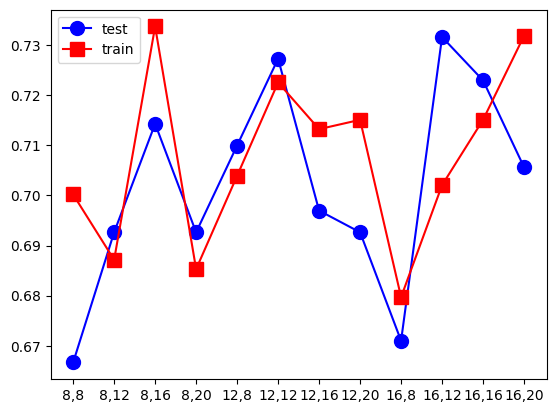

In [27]:
n = 0
ind = []
for k in nh1:
  for j in nh2:
    print('h1 = ', k, ' h2 = ', j, end = ' ')
    print('training loss: %.6f' % (loss_train[n]), end = ' ')
    print('testing loss: %.6f' % (loss_test[n]))
    ind.append(str(k)+','+str(j))
    n = n + 1

n = 0
for k in nh1:
  for j in nh2:
    print('h1 = ', k, ' h2 = ', j, end = ' ')
    print('training accuracy: %.6f' % (accuracy_train[n]), end = ' ')
    print('testing accuracy: %.6f' % (accuracy_test[n]))
    n = n + 1

plt.plot(ind, accuracy_test, 'bo-', markersize=10, label = 'test')
plt.plot(ind, accuracy_train, 'rs-', markersize=10, label = 'train')
plt.legend()
plt.show()